In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('health_data.csv')

In [54]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df.head()

,age,daily_steps,sleep_hours,resting_heart_rate,daily_calorie_balance,fitness_cluster,gender_Male
0,56,5872,10.0,60.2,361.2,0,False
1,69,3365,3.0,75.2,96.9,2,True
2,46,7440,7.3,68.5,107.6,0,False
3,32,3631,10.0,72.5,-461.6,1,True
4,60,9292,4.4,77.1,-146.9,0,False


In [56]:
features = ['age', 'daily_steps', 'sleep_hours', 'resting_heart_rate', 'daily_calorie_balance',
            'gender_Male']

In [58]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[features])

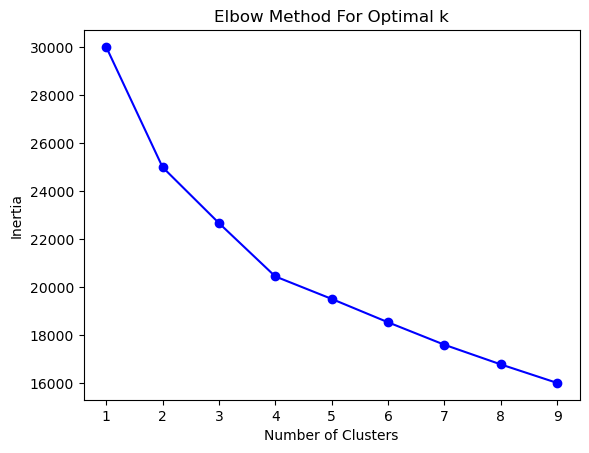

In [60]:
#Elbow plot
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()



In [75]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)#0=Fit Person, 1=Moderate, and 2=Needs Improvement

print(df['cluster'].value_counts())

df['fitness_cluster'] = df['cluster']


cluster
0    2440
1    1309
2    1251
Name: count, dtype: int64


In [77]:
df.head()

,age,daily_steps,sleep_hours,resting_heart_rate,daily_calorie_balance,fitness_cluster,gender_Male,cluster
0,56,5872,10.0,60.2,361.2,0,False,0
1,69,3365,3.0,75.2,96.9,2,True,2
2,46,7440,7.3,68.5,107.6,0,False,0
3,32,3631,10.0,72.5,-461.6,1,True,1
4,60,9292,4.4,77.1,-146.9,0,False,0


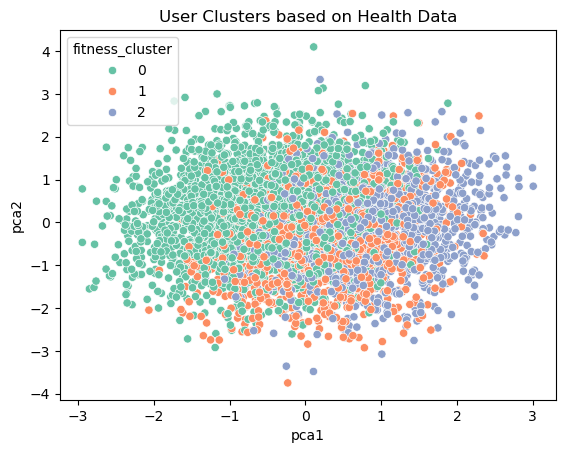

In [79]:
from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)
df_encoded['pca1'] = components[:, 0]
df_encoded['pca2'] = components[:, 1]

# Plot clusters
sns.scatterplot(data=df_encoded, x='pca1', y='pca2', hue='fitness_cluster', palette='Set2')
plt.title("User Clusters based on Health Data")
plt.show()


In [83]:
df.drop(columns=['fitness_cluster'],inplace=True)

In [85]:
df.to_csv('clustered_data.csv',index=False)